# PPO agent using stable-baselines3

In this notebook, we will look at policy optimization using PPO. We will not be writing our own algorithms. Rather, we will use a fork of [OpenAI Baselines](https://github.com/openai/baselines). The version we will use is still in beta but good enough for your tutorials. THe github repository for baselines-3 : https://github.com/DLR-RM/stable-baselines3


The code below follows the [getting started tutorial](https://colab.research.google.com/github/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/stable_baselines_getting_started.ipynb) that comes with this library.`

In [1]:

import gym
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy

from stable_baselines3.common.evaluation import evaluate_policy

import matplotlib.pyplot as plt


import os
import io
import base64
import time
import glob
from IPython.display import HTML


%matplotlib inline

### Environment - CartPole 

We can use the setup here to run on any environment which has state as a single vector and actions are discrete. We will build it on Cart Pole and they try to run this on many other environments like Atari games and others.

In [2]:
def make_env(env_name, seed=None):
    # remove time limit wrapper from environment
    env = gym.make(env_name)
    if seed is not None:
        env.seed(seed)
    return env

C:\Users\cdeng\anaconda3\envs\pytorch\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] 无法在设置线程模式后对其加以更改。
  warnings.warn(str(err))


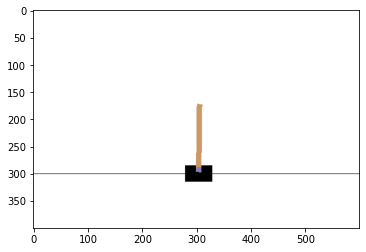

In [6]:
env_name = 'CartPole-v1'

env = make_env(env_name)
env.reset()
plt.imshow(env.render("rgb_array"))
state_shape, n_actions = env.observation_space.shape, env.action_space.n
state_dim = state_shape[0]
env.close()

### Build Actor Critic Network

We will build two simple networks that take in state. One network produces logits for the action probabilities. 2nd network produces the Value of the state. The observation space and action space is as given below for CartPole

    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        

Each model will be a simple one with 1 hidden layer with Relu activation and final layer being logits (for policy/actor network) and value of the state for the Critic Network.m

In [8]:
model = PPO(MlpPolicy, env, verbose=0)

### Untrained Agent

In [9]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

C:\Users\cdeng\anaconda3\envs\pytorch\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:9.53 +/- 0.74


### Train the Agent

In [10]:
# Train the agent for 30000 steps
model.learn(total_timesteps=30000)

### Evaluate Trained Agent

In [12]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"mean_reward: {mean_reward: .2f} +/- {std_reward:.2f}")

mean_reward:  500.00 +/- 0.00
